**Tamrin 1_2**

In [11]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions

In [2]:
X,y=make_classification(n_samples=2000, n_features=2,n_redundant=0,n_clusters_per_class=1,n_classes=2,class_sep=1,random_state=4)
print(X.shape)
print(y.shape)


(2000, 2)
(2000,)


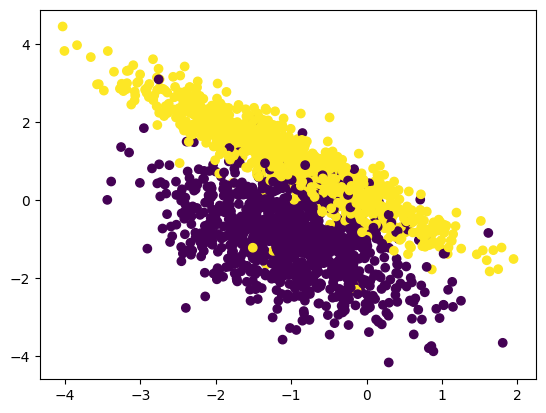

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)


**Tamrin 1_3**

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 2), (1600,), (400, 2), (400,))

In [6]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y)))


[0.397 0.403]
[0.0995 0.1005]


In [7]:
lr_model = LogisticRegression(solver='sag', max_iter=20, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 94.25%
Training Accuracy: 92.94%
Testing Accuracy: 94.25%
Confusion Matrix:
[[180  19]
 [  4 197]]
[[1.18406511e-01 8.81593489e-01]
 [6.61237133e-01 3.38762867e-01]
 [1.32028608e-02 9.86797139e-01]
 [1.59422429e-02 9.84057757e-01]
 [1.35787431e-02 9.86421257e-01]
 [3.90686225e-02 9.60931377e-01]
 [1.96442821e-02 9.80355718e-01]
 [1.99053063e-01 8.00946937e-01]
 [9.80694334e-01 1.93056664e-02]
 [9.99122382e-01 8.77618416e-04]
 [9.89265768e-01 1.07342322e-02]
 [4.23270897e-02 9.57672910e-01]
 [1.01188242e-01 8.98811758e-01]
 [4.20772280e-01 5.79227720e-01]
 [9.99831192e-01 1.68808170e-04]
 [9.99455287e-01 5.44712587e-04]
 [8.94953701e-01 1.05046299e-01]
 [3.13545275e-01 6.86454725e-01]
 [3.85159613e-01 6.14840387e-01]
 [9.99449454e-01 5.50545743e-04]]
[ True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  Tru

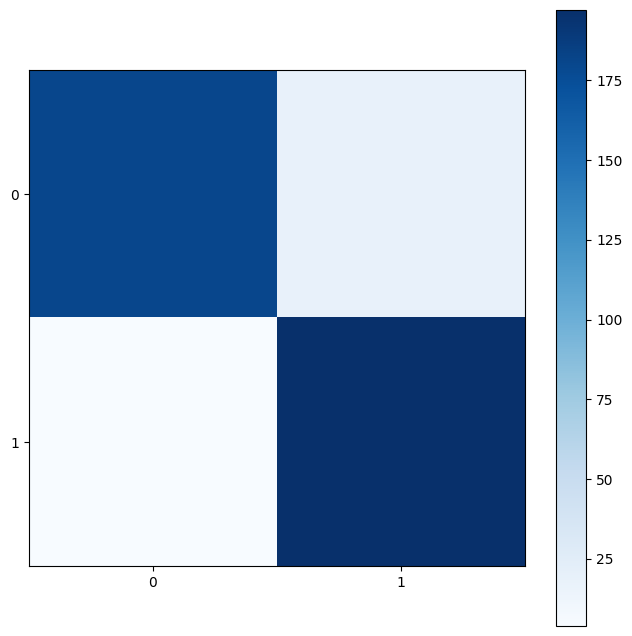

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(range(2))
plt.yticks(range(2))
plt.colorbar()
plt.show()

In [9]:
model_sgd=SGDClassifier(loss="hinge",max_iter=2000, random_state=4,learning_rate='optimal',alpha=0.01)

model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 94.50%
Training Accuracy: 92.88%
Testing Accuracy: 94.50%
Confusion Matrix:
[[180  19]
 [  3 198]]
[[1.18406511e-01 8.81593489e-01]
 [6.61237133e-01 3.38762867e-01]
 [1.32028608e-02 9.86797139e-01]
 [1.59422429e-02 9.84057757e-01]
 [1.35787431e-02 9.86421257e-01]
 [3.90686225e-02 9.60931377e-01]
 [1.96442821e-02 9.80355718e-01]
 [1.99053063e-01 8.00946937e-01]
 [9.80694334e-01 1.93056664e-02]
 [9.99122382e-01 8.77618416e-04]
 [9.89265768e-01 1.07342322e-02]
 [4.23270897e-02 9.57672910e-01]
 [1.01188242e-01 8.98811758e-01]
 [4.20772280e-01 5.79227720e-01]
 [9.99831192e-01 1.68808170e-04]
 [9.99455287e-01 5.44712587e-04]
 [8.94953701e-01 1.05046299e-01]
 [3.13545275e-01 6.86454725e-01]
 [3.85159613e-01 6.14840387e-01]
 [9.99449454e-01 5.50545743e-04]]
[ True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  Tru

# **tamrin 1_4**

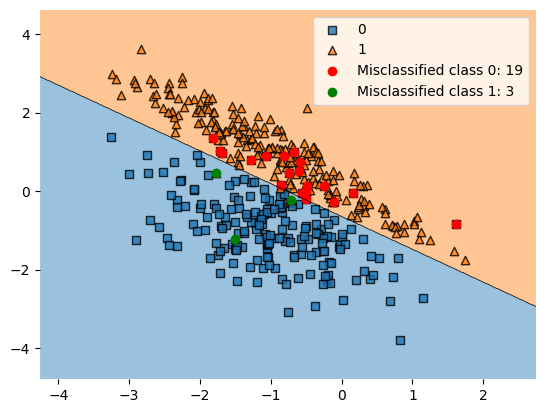

In [12]:
plot_decision_regions(x_test,y_test,clf=lr_model)
# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)

# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')
# افزودن افسانه به نمودار
plt.legend()


# **tamrin 1_5**

In [ ]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
widget.data
widget_data=widget.data_as_pandas

In [ ]:
widget_data.to_csv('drawdata_2.csv', index=False)


In [ ]:
df=pd.read_csv(r'/content/drawdata.csv')

<bound method NDFrame.describe of               x           y    color label
0    464.321366  460.324664  #1f77b4     a
1    440.679276  473.223775  #1f77b4     a
2    446.264726  488.699162  #1f77b4     a
3    434.766807  454.003171  #1f77b4     a
4    421.409568  456.719823  #1f77b4     a
..          ...         ...      ...   ...
915  602.671414  262.561890  #ff7f0e     b
916  605.574013  294.807822  #ff7f0e     b
917  624.461600  266.596254  #ff7f0e     b
918  649.893763  262.529397  #ff7f0e     b
919  646.613992  270.752457  #ff7f0e     b

[920 rows x 4 columns]>

In [ ]:
df=df.drop(columns=['color'])
df.keys()

Index(['x', 'y', 'label'], dtype='object')

In [ ]:
print(df.shape)
df

(920, 3)


,x,y,label
0,464.321366,460.324664,a
1,440.679276,473.223775,a
2,446.264726,488.699162,a
3,434.766807,454.003171,a
4,421.409568,456.719823,a
...,...,...,...
915,602.671414,262.561890,b
916,605.574013,294.807822,b
917,624.461600,266.596254,b
918,649.893763,262.529397,b


Dimensions of the dataframe: (920, 3)


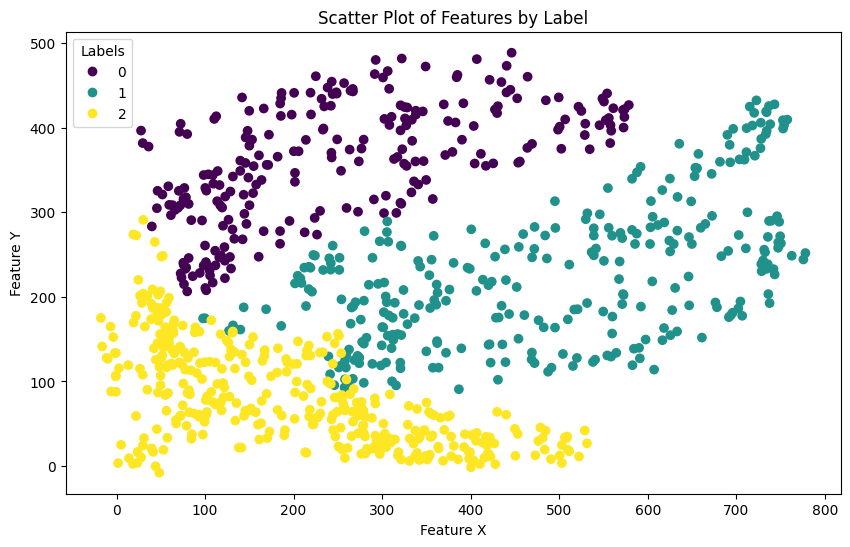

In [ ]:
print(f"Dimensions of the dataframe: {df.shape}")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x'], df['y'], c=df['label'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Features by Label')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [ ]:
df

,x,y,label
0,207.504430,441.117187,a
1,192.397353,431.830357,a
2,217.758698,407.463101,a
3,216.726155,392.411792,a
4,226.530691,357.844696,a
...,...,...,...
359,482.597579,176.285065,c
360,492.622799,190.559477,c
361,498.446805,206.672485,c
362,477.853972,193.028354,c


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
df

,x,y,label
0,0.605644,0.942861,a
1,0.575936,0.968836,a
2,0.582954,1.000000,a
3,0.568506,0.930131,a
4,0.551721,0.935602,a
...,...,...,...
915,0.779495,0.544615,b
916,0.783142,0.609551,b
917,0.806876,0.552740,b
918,0.838834,0.544550,b


In [ ]:
label_mapping = {'a': 0, 'b': 1, 'c': 2}
# تبدیل برچسب‌های متنی به اعداد با استفاده
df['label_new'] = df['label'].map(label_mapping)
print(df)


            x         y label  label_new
0    0.605644  0.942861     a          0
1    0.575936  0.968836     a          0
2    0.582954  1.000000     a          0
3    0.568506  0.930131     a          0
4    0.551721  0.935602     a          0
..        ...       ...   ...        ...
915  0.779495  0.544615     b          1
916  0.783142  0.609551     b          1
917  0.806876  0.552740     b          1
918  0.838834  0.544550     b          1
919  0.834713  0.561109     b          1

[920 rows x 4 columns]


In [ ]:
X=df.iloc[:,0:2].values
y=df.iloc[:,3].values
print(X.shape)
print(y.shape)
print(X)
print(y)

(920, 2)
(920,)
[[0.60564431 0.94286076]
 [0.57593572 0.96883639]
 [0.58295438 1.        ]
 ...
 [0.80687612 0.55273954]
 [0.83883411 0.54454989]
 [0.83471275 0.56110911]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((736, 2), (736,), (184, 2), (184,))

In [ ]:
y_train

array([2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0,
       1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,

In [ ]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y)))


[0.20869565 0.26304348 0.32826087]
[0.05217391 0.06630435 0.08152174]


In [ ]:
lr_model = LogisticRegression(solver='sag', max_iter=10, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

#روی داده های ازمایشی چقد خوب بوده و تستی
train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

#ماتریس در هم ریختگی
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
error = mc.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {error:.5f}\n")
print(lr_model.predict_proba(x_test)[-10:])


Accuracy: 89.67%
Training Accuracy: 91.17%
Testing Accuracy: 89.67%
Confusion Matrix:
[[43  1  4]
 [ 1 48 12]
 [ 0  1 74]]
Mean Squared Error (MSE): 0.16848

[[0.80946115 0.12015892 0.07037992]
 [0.14906864 0.45445571 0.39647566]
 [0.02741653 0.08250635 0.89007712]
 [0.02802622 0.25172697 0.72024681]
 [0.03088223 0.05986141 0.90925637]
 [0.60515136 0.37224601 0.02260263]
 [0.00679183 0.16053198 0.83267619]
 [0.01764888 0.17939356 0.80295756]
 [0.06658577 0.92188711 0.01152712]
 [0.91331672 0.06580048 0.0208828 ]]


In [ ]:
model_sgd=SGDClassifier(loss="hinge",max_iter=700, random_state=4,learning_rate='optimal',alpha=0.002)

model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 86.41%
Training Accuracy: 88.72%
Testing Accuracy: 86.41%
Confusion Matrix:
[[45  1  2]
 [ 3 40 18]
 [ 0  1 74]]
[[0.01067075 0.97601594 0.0133133 ]
 [0.83107761 0.08434341 0.08457899]
 [0.00162195 0.13626704 0.86211101]
 [0.14516146 0.44731355 0.40752499]
 [0.00196601 0.07204258 0.92599141]
 [0.04295158 0.0366706  0.92037781]
 [0.05223289 0.07537268 0.87239443]
 [0.02387615 0.91320702 0.06291684]
 [0.16783757 0.81928052 0.01288191]
 [0.02783054 0.093763   0.87840646]
 [0.80946115 0.12015892 0.07037992]
 [0.14906864 0.45445571 0.39647566]
 [0.02741653 0.08250635 0.89007712]
 [0.02802622 0.25172697 0.72024681]
 [0.03088223 0.05986141 0.90925637]
 [0.60515136 0.37224601 0.02260263]
 [0.00679183 0.16053198 0.83267619]
 [0.01764888 0.17939356 0.80295756]
 [0.06658577 0.92188711 0.01152712]
 [0.91331672 0.06580048 0.0208828 ]]
[ True  True  True  True  True  True  True  True False False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  Tr

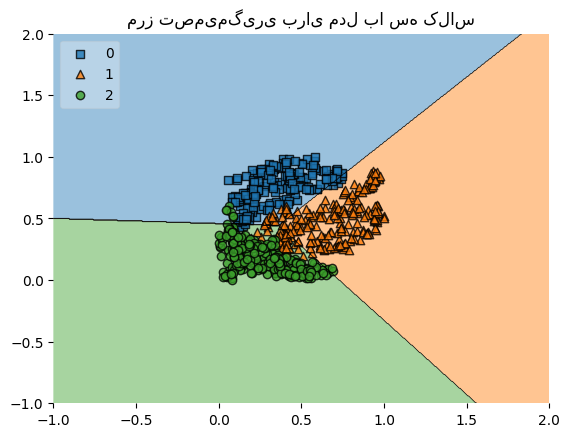

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=model_sgd, legend=2)
plt.title('مرز تصمیم‌گیری برای مدل با سه کلاس')
plt.show()


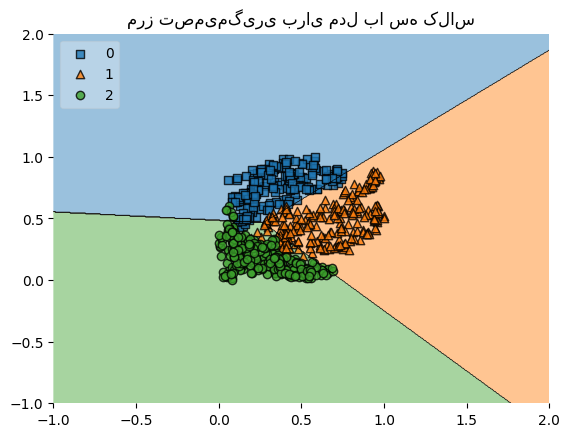

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x_train, y_train, clf=lr_model, legend=2)
plt.title('مرز تصمیم‌گیری برای مدل با سه کلاس')
plt.show()


(array([  8,   9,  13,  44,  59,  64,  66,  73,  82, 107, 113, 114, 119,
       121, 124, 130, 134, 138, 151, 153, 155, 159, 167, 175, 177]),)


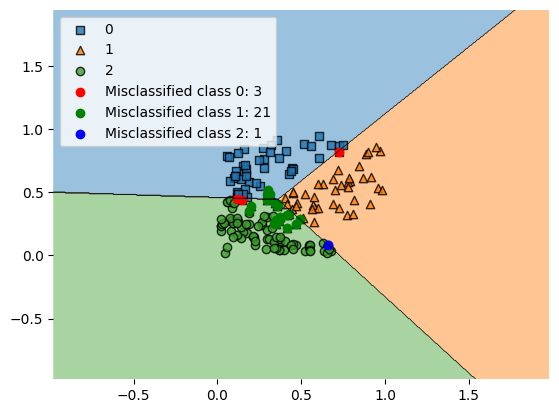

In [ ]:
plot_decision_regions(x_test,y_test,clf=model_sgd)
# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)
print(misclassified)
# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
errors_class_2 = np.sum(y_test[misclassified] == 2)
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')
# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 2 با رنگ آبی
plt.scatter(x_test[misclassified][y_test[misclassified] == 2, 0],
            x_test[misclassified][y_test[misclassified] == 2, 1],
            color='blue', label=f'Misclassified class 2: {errors_class_2}')

plt.legend()
